In [1]:


#bibliotecas internas
import os
import random
import gc

#bibliotecas externas
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, accuracy_score

In [11]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

tf.config.list_physical_devices('GPU')

from tensorflow.python.client import device_lib

device_lib.list_local_devices()

tf.test.is_built_with_cuda()

tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [12]:
#dir = "C:/Users/jgoncalves/Desktop"
modelos = ['Citan','CLA','ClasseA','ClasseB','ClasseC(205)','ClasseC(206)','ClasseE','ClasseS','CLS','EQA','EQB','EQC','EQE','EQS','ForFour','ForTwo','GLA','GLA(156)','GLB','GLC','GLE','SL','Vito']
modelo_train =[]
modelo_teste = []
train =[]
teste = []
train_imgs = []
test_imgs= []
#pastas de cada conjunto de imagens - treinar
#for modelo in modelos:
#    modelo_train.append(dir + "/MODELOS_treino/{}/".format(modelo))
#mercedes_train=dir + "/Dataset_treino/Mercedes/"
#smart_train=dir + "/Dataset_treino/smart/"
#outros_train="./covid19/train/COVID_ext_acgan/"

#listas de imagens por cada marca(ou não) - treinar (ALTERAR ESTES VALORES PARA EXTENDER DATASET)
#for j in range(len(modelo_train)):
#    train.append((dir + "/MODELOS_treino/{}/{}").format(modelos[j],i) for i in os.listdir(modelo_train[j]))
#    print(modelos[j])
#train_mercedes = [(dir + "/Dataset_treino/Mercedes/{}").format(i) for i in os.listdir(mercedes_train)]
#train_smart = [(dir + "/Dataset_treino/smart/{}").format(i) for i in os.listdir(smart_train)]
#train_outros = ['./covid19/train/COVID_ext_acgan/{}'.format(i) for i in os.listdir(covid_dir_train)]

#pastas de cada conjunto de imagens - teste
#for modelo in modelos:
#    modelo_teste.append(dir + "/MODELOS_teste/{}/".format(modelo))
#mercedes_test= dir + "/Dataset_teste/Mercedes/"
#smart_test= dir + "/Dataset_teste/smart/"
#covid_dir_test="./covid19/test/COVID/"

#listas de imagens por cada marca (ou não) - teste (TESTE MANTEM SE COM DATASET ORIGINAL)
#for j in range(len(modelo_teste)):
#    teste.append((dir + "/MODELOS_teste/{}/{}").format(modelos[j],i) for i in os.listdir(modelo_teste[j]))
#test_mercedes = [(dir + "/Dataset_teste/Mercedes/{}").format(i) for i in os.listdir(mercedes_test)]
#test_smart = [(dir + "/Dataset_teste/smart/{}").format(i) for i in os.listdir(smart_test)]
#test_covid = ['./covid19/test/COVID/{}'.format(i) for i in os.listdir(covid_dir_test)]

#print("modelo_train",modelo_train)
#print("modelo_teste",modelo_teste)
#print("train",train)
#print("teste",teste)

#lista de fotos para teste (junção dos raios-x dos três tipos de condições)
#falta outros
#for i in train:
#    train_imgs += i
#for i in teste:
#    test_imgs += i
#dispor aleatoriamente as imagens
#random.shuffle(train_imgs)
#random.shuffle(test_imgs)

#eliminar dados que não serao reutilizados
#del train_mercedes
#del train_smart
#del train_pneu
#del test_mercedes
#del test_smart
#del test_pneu

#retirar dados eliminados da memoria
#gc.collect()

In [13]:
dir = "D:/joaogonc"

#pastas de cada conjunto de imagens - treinar
Citan_train=dir + "/MODELOS_treino/Citan/"
CLA_train=dir + "/MODELOS_treino/CLA/"
ClasseA_train=dir + "/MODELOS_treino/ClasseA/"
ClasseB_train=dir + "/MODELOS_treino/ClasseB/"
ClasseC205_train=dir + "/MODELOS_treino/ClasseC(205)/"
ClasseC206_train=dir + "/MODELOS_treino/ClasseC(206)/"
ClasseE_train=dir + "/MODELOS_treino/ClasseE/"
ClasseS_train=dir + "/MODELOS_treino/ClasseS/"
CLS_train=dir + "/MODELOS_treino/CLS/"
EQA_train=dir + "/MODELOS_treino/EQA/"
EQB_train=dir + "/MODELOS_treino/EQB/"
EQC_train=dir + "/MODELOS_treino/EQC/"
EQE_train=dir + "/MODELOS_treino/EQE/"
EQS_train=dir + "/MODELOS_treino/EQS/"
ForFour_train=dir + "/MODELOS_treino/ForFour/"
ForTwo_train=dir + "/MODELOS_treino/ForTwo/"
GLA_train=dir + "/MODELOS_treino/GLA/"
GLA156_train=dir + "/MODELOS_treino/GLA(156)/"
GLB_train=dir + "/MODELOS_treino/GLB/"
GLC_train=dir + "/MODELOS_treino/GLC/"
GLE_train=dir + "/MODELOS_treino/GLE/"
SL_train=dir + "/MODELOS_treino/SL/"
Vito_train=dir + "/MODELOS_treino/Vito/"

#listas de imagens por cada marca(ou não) - treinar (ALTERAR ESTES VALORES PARA EXTENDER DATASET)
train_Citan = [(dir + "/MODELOS_treino/Citan/{}").format(i) for i in os.listdir(Citan_train)]
train_CLA = [(dir + "/MODELOS_treino/CLA/{}").format(i) for i in os.listdir(CLA_train)]
train_ClasseA = [(dir + "/MODELOS_treino/ClasseA/{}").format(i) for i in os.listdir(ClasseA_train)]
train_ClasseB = [(dir + "/MODELOS_treino/ClasseB/{}").format(i) for i in os.listdir(ClasseB_train)]
train_ClasseC205 = [(dir + "/MODELOS_treino/ClasseC(205)/{}").format(i) for i in os.listdir(ClasseC205_train)]
train_ClasseC206 = [(dir + "/MODELOS_treino/ClasseC(206)/{}").format(i) for i in os.listdir(ClasseC206_train)]
train_ClasseE = [(dir + "/MODELOS_treino/ClasseE/{}").format(i) for i in os.listdir(ClasseE_train)]
train_ClasseS = [(dir + "/MODELOS_treino/ClasseS/{}").format(i) for i in os.listdir(ClasseS_train)]
train_CLS = [(dir + "/MODELOS_treino/CLS/{}").format(i) for i in os.listdir(CLS_train)]
train_EQA = [(dir + "/MODELOS_treino/EQA/{}").format(i) for i in os.listdir(EQA_train)]
train_EQB = [(dir + "/MODELOS_treino/EQB/{}").format(i) for i in os.listdir(EQB_train)]
train_EQC = [(dir + "/MODELOS_treino/EQC/{}").format(i) for i in os.listdir(EQC_train)]
train_EQE = [(dir + "/MODELOS_treino/EQE/{}").format(i) for i in os.listdir(EQE_train)]
train_EQS = [(dir + "/MODELOS_treino/EQS/{}").format(i) for i in os.listdir(EQS_train)]
train_ForFour = [(dir + "/MODELOS_treino/ForFour/{}").format(i) for i in os.listdir(ForFour_train)]
train_ForTwo = [(dir + "/MODELOS_treino/ForTwo/{}").format(i) for i in os.listdir(ForTwo_train)]
train_GLA = [(dir + "/MODELOS_treino/GLA/{}").format(i) for i in os.listdir(GLA_train)]
train_GLA156 = [(dir + "/MODELOS_treino/GLA(156)/{}").format(i) for i in os.listdir(GLA156_train)]
train_GLB = [(dir + "/MODELOS_treino/GLB/{}").format(i) for i in os.listdir(GLB_train)]
train_GLC = [(dir + "/MODELOS_treino/GLC/{}").format(i) for i in os.listdir(GLC_train)]
train_GLE = [(dir + "/MODELOS_treino/GLE/{}").format(i) for i in os.listdir(GLE_train)]
train_SL = [(dir + "/MODELOS_treino/SL/{}").format(i) for i in os.listdir(SL_train)]
train_Vito = [(dir + "/MODELOS_treino/Vito/{}").format(i) for i in os.listdir(Vito_train)]


#pastas de cada conjunto de imagens - teste
Citan_test=dir + "/MODELOS_teste/Citan/"
CLA_test=dir + "/MODELOS_teste/CLA/"
ClasseA_test=dir + "/MODELOS_teste/ClasseA/"
ClasseB_test=dir + "/MODELOS_teste/ClasseB/"
ClasseC205_test=dir + "/MODELOS_teste/ClasseC(205)/"
ClasseC206_test=dir + "/MODELOS_teste/ClasseC(206)/"
ClasseE_test=dir + "/MODELOS_teste/ClasseE/"
ClasseS_test=dir + "/MODELOS_teste/ClasseS/"
CLS_test=dir + "/MODELOS_teste/CLS/"
EQA_test=dir + "/MODELOS_teste/EQA/"
EQB_test=dir + "/MODELOS_teste/EQB/"
EQC_test=dir + "/MODELOS_teste/EQC/"
EQE_test=dir + "/MODELOS_teste/EQE/"
EQS_test=dir + "/MODELOS_teste/EQS/"
ForFour_test=dir + "/MODELOS_teste/ForFour/"
ForTwo_test=dir + "/MODELOS_teste/ForTwo/"
GLA_test=dir + "/MODELOS_teste/GLA/"
GLA156_test=dir + "/MODELOS_teste/GLA(156)/"
GLB_test=dir + "/MODELOS_teste/GLB/"
GLC_test=dir + "/MODELOS_teste/GLC/"
GLE_test=dir + "/MODELOS_teste/GLE/"
SL_test=dir + "/MODELOS_teste/SL/"
Vito_test=dir + "/MODELOS_teste/Vito/"

#listas de imagens por cada marca (ou não) - teste (TESTE MANTEM SE COM DATASET ORIGINAL)
test_Citan = [(dir + "/MODELOS_teste/Citan/{}").format(i) for i in os.listdir(Citan_test)]
test_CLA = [(dir + "/MODELOS_teste/CLA/{}").format(i) for i in os.listdir(CLA_test)]
test_ClasseA = [(dir + "/MODELOS_teste/ClasseA/{}").format(i) for i in os.listdir(ClasseA_test)]
test_ClasseB = [(dir + "/MODELOS_teste/ClasseB/{}").format(i) for i in os.listdir(ClasseB_test)]
test_ClasseC205 = [(dir + "/MODELOS_teste/ClasseC(205)/{}").format(i) for i in os.listdir(ClasseC205_test)]
test_ClasseC206 = [(dir + "/MODELOS_teste/ClasseC(206)/{}").format(i) for i in os.listdir(ClasseC206_test)]
test_ClasseE = [(dir + "/MODELOS_teste/ClasseE/{}").format(i) for i in os.listdir(ClasseE_test)]
test_ClasseS = [(dir + "/MODELOS_teste/ClasseS/{}").format(i) for i in os.listdir(ClasseS_test)]
test_CLS = [(dir + "/MODELOS_teste/CLS/{}").format(i) for i in os.listdir(CLS_test)]
test_EQA = [(dir + "/MODELOS_teste/EQA/{}").format(i) for i in os.listdir(EQA_test)]
test_EQB = [(dir + "/MODELOS_teste/EQB/{}").format(i) for i in os.listdir(EQB_test)]
test_EQC = [(dir + "/MODELOS_teste/EQC/{}").format(i) for i in os.listdir(EQC_test)]
test_EQE = [(dir + "/MODELOS_teste/EQE/{}").format(i) for i in os.listdir(EQE_test)]
test_EQS = [(dir + "/MODELOS_teste/EQS/{}").format(i) for i in os.listdir(EQS_test)]
test_ForFour = [(dir + "/MODELOS_teste/ForFour/{}").format(i) for i in os.listdir(ForFour_test)]
test_ForTwo = [(dir + "/MODELOS_teste/ForTwo/{}").format(i) for i in os.listdir(ForTwo_test)]
test_GLA = [(dir + "/MODELOS_teste/GLA/{}").format(i) for i in os.listdir(GLA_test)]
test_GLA156 = [(dir + "/MODELOS_teste/GLA(156)/{}").format(i) for i in os.listdir(GLA156_test)]
test_GLB = [(dir + "/MODELOS_teste/GLB/{}").format(i) for i in os.listdir(GLB_test)]
test_GLC = [(dir + "/MODELOS_teste/GLC/{}").format(i) for i in os.listdir(GLC_test)]
test_GLE = [(dir + "/MODELOS_teste/GLE/{}").format(i) for i in os.listdir(GLE_test)]
test_SL = [(dir + "/MODELOS_teste/SL/{}").format(i) for i in os.listdir(SL_test)]
test_Vito = [(dir + "/MODELOS_teste/Vito/{}").format(i) for i in os.listdir(Vito_test)]

#lista de fotos para teste (junção dos raios-x dos três tipos de condições)
#falta outros
train_imgs = train_CLA+train_ClasseA+train_ClasseC205+train_ClasseC206+train_EQB+train_GLC+train_Citan+train_ClasseB+train_ClasseE+train_ClasseS+train_CLS+train_EQA+train_EQC+train_EQE+train_EQS+train_ForFour+train_ForTwo+train_GLA+train_GLA156+train_GLB+train_GLE+train_SL+train_Vito
test_imgs = test_CLA + test_ClasseA+test_ClasseC205+test_ClasseC206+test_EQB+test_GLC+test_Citan+test_ClasseB+test_ClasseE+test_ClasseS+test_CLS+test_EQA+test_EQC+test_EQE+test_EQS+test_ForFour+test_ForTwo+test_GLA+test_GLA156+test_GLB+test_GLE+test_SL+test_Vito
#dispor aleatoriamente as imagens
random.shuffle(train_imgs)
random.shuffle(test_imgs)

#eliminar dados que não serao reutilizados
#del train_mercedes
#del train_smart
#del train_pneu
#del test_mercedes
#del test_smart
#del test_pneu

#retirar dados eliminados da memoria
#gc.collect()

In [14]:
#definir tamanho das imagens
nlinhas = 256
ncolunas = 256
canais = 3  #dimensões das cores (1 para preto e branco e 3 para colorido)


# Função para Colocar fotos no formato correto
def processar_imagens(lista_de_imagens):

    X = [] # imagens
    y = [] # categorias
    
    for imagem in lista_de_imagens:
        print(imagem)
        imagem_cor = cv2.resize(cv2.imread(imagem, cv2.IMREAD_COLOR), (nlinhas,ncolunas), interpolation=cv2.INTER_CUBIC) # Ler imagens a cores (256x256x3)
        #print(type(cv2.imread(imagem, cv2.IMREAD_COLOR)))
        # inserir imagem no array das imagens
        if canais == 1:
          imagem_peb = cv2.cvtColor(imagem_cor, cv2.COLOR_BGR2GRAY) # converter imagens a preto e branco
          X.append(imagem_peb)
        elif canais == 3:
          X.append(imagem_cor)
        #print(y)
        # dividir imagens por categoria
        #for i in range(len(modelos)):
        #    if modelos[i] in os.path.split(imagem)[0]:
        #        y.append(i)
        if "Citan" in os.path.split(imagem)[0]:
            y.append(0)  
        elif "CLA" in os.path.split(imagem)[0]:
            y.append(1)
        elif "ClasseA" in os.path.split(imagem)[0]:
            y.append(2)
        elif "ClasseB" in os.path.split(imagem)[0]:
            y.append(3)
        elif "ClasseC(205)" in os.path.split(imagem)[0]:
            y.append(4)
        elif "ClasseC(206)" in os.path.split(imagem)[0]:
            y.append(5)
        elif "ClasseE" in os.path.split(imagem)[0]:
            y.append(6)
        elif "ClasseS" in os.path.split(imagem)[0]:
            y.append(7)
        elif "CLS" in os.path.split(imagem)[0]:
            y.append(8)
        elif "EQA" in os.path.split(imagem)[0]:
            y.append(9)
        elif "EQB" in os.path.split(imagem)[0]:
            y.append(10)
        elif "EQC" in os.path.split(imagem)[0]:
            y.append(11)
        elif "EQE" in os.path.split(imagem)[0]:
            y.append(12)
        elif "EQS" in os.path.split(imagem)[0]:
            y.append(13)
        elif "ForFour" in os.path.split(imagem)[0]:
            y.append(14)
        elif "ForTwo" in os.path.split(imagem)[0]:
            y.append(15)
        elif "GLA(156)" in os.path.split(imagem)[0]:
            y.append(17)
        elif "GLA" in os.path.split(imagem)[0]:
            y.append(16)
        elif "GLB" in os.path.split(imagem)[0]:
            y.append(18)
        elif "GLC" in os.path.split(imagem)[0]:
            y.append(19)
        elif "GLE" in os.path.split(imagem)[0]:
            y.append(20)
        elif "SL" in os.path.split(imagem)[0]:
            y.append(21)
        elif "Vito" in os.path.split(imagem)[0]:
            y.append(22)
    return X, y


In [15]:
#executar função para processar imagens e obter as variaveis
X_train, y_train = processar_imagens(train_imgs)
X_test, y_test = processar_imagens(test_imgs)
#retirar dados eliminados da memoria
#gc.collect()

print(X_train[0].shape) #dimensoes da imagem
print(X_test[0].shape) #dimensoes da imagem
print(y_test)

D:/joaogonc/MODELOS_treino/CLA/img_0_0_120.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_121.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_122.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_123.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_124.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_125.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_126.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_127.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_128.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_129.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_130.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_131.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_132.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_133.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_134.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_135.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_136.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_137.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_138.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_139.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_140.jpg
D:/joaogonc/M

In [1]:
#mostrar figuras de treino
#plt.figure(figsize=(200,100))
#columns = 5
#for i in range(columns):
#    plt.subplot(int(5 / columns) + 1, columns, i + 1)
#    plt.imshow(X_train[i], cmap='gray', vmin=0, vmax=255)

In [2]:
#mostrar figuras de teste
#plt.figure(figsize=(20,10))
#for i in range(columns):
#    plt.subplot(int(5 / columns) + 1, columns, i + 1)
#    plt.imshow(X_test[i], cmap='gray', vmin=0, vmax=255)

Legenda:
0 -> Mercedes, 1 -> smart


Text(0.5, 0, 'Marca')

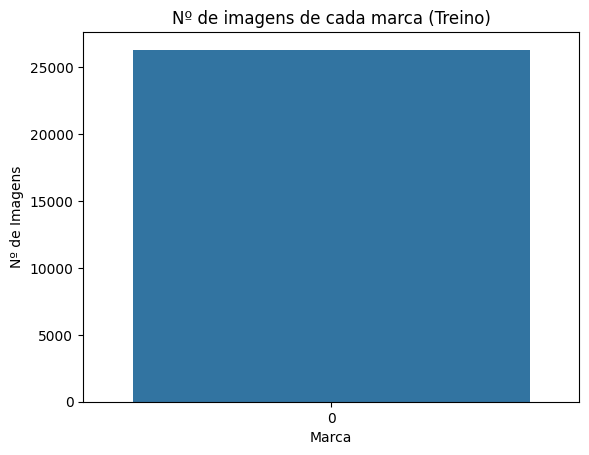

In [18]:
#eliminar arrays com as imagens
#del train_imgs 
#del test_imgs
#gc.collect()

#Converter para uma array do numpy
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

#mostrar dif classes
print("Legenda:")
print("0 -> Mercedes, 1 -> smart")
sns.countplot(y_train)
plt.title('Nº de imagens de cada marca (Treino)')
plt.ylabel("Nº de Imagens")
plt.xlabel("Marca")

Legenda:
0 -> Mercedes, 1 -> smart


Text(0.5, 0, 'Marca')

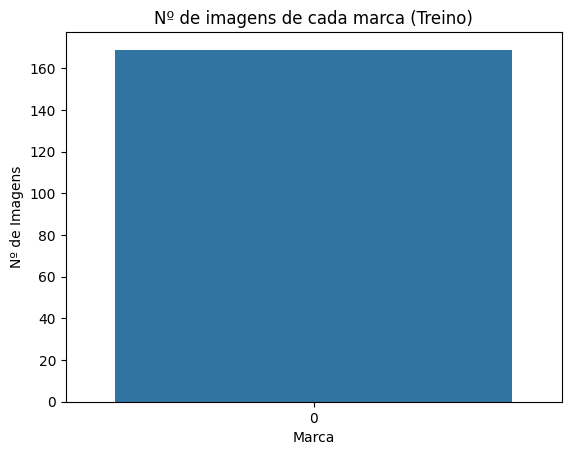

In [19]:
print("Legenda:")
print("0 -> Mercedes, 1 -> smart")
sns.countplot(y_test)
plt.title('Nº de imagens de cada marca (Treino)')
plt.ylabel("Nº de Imagens")
plt.xlabel("Marca")

In [20]:
# Dimensão de cada lista de dados (x,y)
print("Formato de treino:", X_train.shape)
print("Formato da identificação de treino:", y_train.shape)

print("Formato de teste:", X_test.shape)
print("Formato da identificação de teste:", y_test.shape)

Formato de treino: (26319, 256, 256, 3)
Formato da identificação de treino: (26319,)
Formato de teste: (169, 256, 256, 3)
Formato da identificação de teste: (169,)


In [21]:
num_classes=23
input_shape = (256, 256, 3)

dummies = pd.get_dummies(y_train) # numero para cada classe (marca)
y_train = dummies.values

dummies = pd.get_dummies(y_test) # numero para cada classe (marca)
y_test = dummies.values

In [22]:
# Escalar imagens entre [0, 1]
with tf.device('/cpu:0'):
    X_train = X_train.astype("float32") / 255
    X_test = X_test.astype("float32") / 255

# Dimensões do X
print("Forma y_train:", y_train.shape)
print("Forma x_train:", X_train.shape)

# Numero de exemplos
print(X_train.shape[0], "dados de treino")
print(X_test.shape[0], "dados de teste")


Forma y_train: (26319, 23)
Forma x_train: (26319, 256, 256, 3)
26319 dados de treino
169 dados de teste


In [23]:
import torch
#save matrixes
torch.save(X_train,r"D:\joaogonc\nump\train.pt", pickle_protocol=4)
torch.save(X_test,r"D:\joaogonc\nump\test.pt",pickle_protocol=4)

torch.save(y_train,r"D:\joaogonc\nump\y_train.pt", pickle_protocol=4)
torch.save(y_test,r"D:\joaogonc\nump\y_test.pt",pickle_protocol=4)


In [3]:
# mostrar imagem e valor
#plt.imshow(X_train[100].squeeze())
#print(y_train[100])

In [4]:
#plt.imshow(X_test[5].squeeze())
#print(y_test[5])

In [16]:
# modelo de rede neuronal
model = keras.Sequential(
        [
        keras.Input(shape=input_shape),
        layers.ZeroPadding2D(padding=(1, 1)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dense(128, activation='relu'),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Flatten(),
        layers.Dense(200),
        layers.Dropout(0.2),
        layers.Dense(100),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# sumario da rede
model.summary()

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executin

In [21]:
# fases e batch
batch_size = 16
epochs = 20

from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y
with tf.device("CPU"):
    train_gen = DataGenerator(X_train, y_train, 14)
    test_gen = DataGenerator(X_test, y_test, 14)

var = tf.Variable(np.random.random(size=(1,)))
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate=.01, decay_steps=20, decay_rate=.1)
opt = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate)
loss = lambda: 3 * var
opt.minimize(loss, var_list=[var])


model.compile(loss="categorical_crossentropy",optimizer='SGD', metrics=["accuracy"])

hist = model.fit(train_gen,
                    epochs=20,
                    validation_data=test_gen)

# compilação do modelo
#@jit(target_backend='cuda')

#hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs)
# execução do modelo
#@jit(target_backend='cuda')



Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op BroadcastGradientArgs in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sum in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/de

KeyboardInterrupt: 

In [ ]:
# fases e batch
batch_size = 16
epochs = 20

import tensorflow as tf
from tensorflow.keras.utils import Sequence
import numpy as np
import torch

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y
    
#save matrixes
X_train = torch.load(r"D:\joaogonc\nump\train.pt", map_location=torch.device('cpu'))
X_test = torch.load(r"D:\joaogonc\nump\test.pt", map_location=torch.device('cpu'))

y_train = torch.load(r"D:\joaogonc\nump\y_train.pt", map_location=torch.device('cpu'))
y_test = torch.load(r"D:\joaogonc\nump\y_test.pt", map_location=torch.device('cpu'))
#torch.save(X_test,r"D:\joaogonc\nump\test.pt",pickle_protocol=4)




# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model("C:/Users/jgoncalves/Desktop/modelo_cnn_modelos/marca_modelo_sgd3.h5")

with tf.device("CPU"):
    train_gen = DataGenerator(X_train, y_train, 14)
    test_gen = DataGenerator(X_test, y_test, 14)

# Show the model architecture
model.summary()

loss, acc = model.evaluate(test_gen, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

In [ ]:
# guardar modelo
#model.save_weights("C:/Users/jgoncalves/Desktop/modelo_cnn_modelos/w/marcas_modelo_pesos_sgd5.h5")
#model.save("C:/Users/jgoncalves/Desktop/modelo_cnn_modelos/marca_modelo_sgd5.h5")

#class DataGenerator(Sequence):
    #def __init__(self, x_set, y_set, batch_size):
        #self.x, self.y = x_set, y_set
        #self.batch_size = batch_size

    #def __len__(self):
        #return int(np.ceil(len(self.x) / float(self.batch_size)))

    #def __getitem__(self, idx):
        #batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        #batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        #return batch_x, batch_y
#with tf.device("CPU"):
    #train_gen = DataGenerator(X_train, y_train, 16)
    #test_gen = DataGenerator(X_test, y_test, 16)

# total de perdas e precisão do treino
score_train = model.evaluate(train_gen, verbose=0)
print("Perdas do treino:", score_train[0])
print("Precisão do treino:", score_train[1])

# total de perdas e precisão do teste
score_test = model.evaluate(test_gen, verbose=0)
print("Perdas do teste:", score_test[0])
print("Precisão do teste:", score_test[1])

In [ ]:
# dados previstos (teste)
with tf.device("/cpu:0"):
    pred = model.predict(X_test)
print(pred)
print(y_test)

In [ ]:
# classes previstas e classes obtidas
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print("Adivinhado:", predict_classes)
print("Esperado:", expected_classes)

#precisão do teste
correct = accuracy_score(expected_classes,predict_classes)
print(f"Precisão: {correct}")

In [5]:
# Previsão através de uma imagem
#definir tamanho das imagens
nlinhas = 256
ncolunas = 256
canais = 3  #dimensões das cores (1 para preto e branco e 3 para colorido)

# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model("C:/Users/jgoncalves/Desktop/modelo_cnn_modelos/marca_modelo_sgd3.h5")
imagem_pasta = r"C:\Users\jgoncalves\Desktop\MODELOS_teste\CLA\img_0_0_213.jpg"
imagem_cor = cv2.resize(cv2.imread(imagem_pasta, cv2.IMREAD_COLOR), (nlinhas,ncolunas), interpolation=cv2.INTER_CUBIC)
#imagem_peb = cv2.cvtColor(imagem_cor, cv2.COLOR_BGR2GRAY)
#tf.expand_dims(
imagem = tf.expand_dims(np.array(imagem_cor).astype("float32") / 255, 0)   
    #,3)
pred = model.predict(imagem)
pred = np.argmax(pred)
marcas = ['Citan','CLA','ClasseA','ClasseB','ClasseC(205)','ClasseC(206)','ClasseE','ClasseS','CLS','EQA','EQB','EQC','EQE','EQS','ForFour','ForTwo','GLA','GLA(156)','GLB','GLC','GLE','SL','Vito']
#plt.figure(figsize=(5,2.5))
#plt.imshow(imagem_cor)
print("Previu-se ser " + marcas[pred] + ".")

NameError: name 'tf' is not defined

In [ ]:
# precisão (treino/teste)
acc=np.array(hist.history['accuracy'])
plt.plot(acc,'b')
plt.plot(hist.history['val_accuracy'],'m')
plt.title('Precisão do Modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()
# perdas (treino/teste)
loss=np.array(hist.history['loss'])
plt.plot(loss,'b',label='train')
plt.plot(hist.history['val_loss'],'m',label='test')
plt.title('Perdas do Modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()